In [1]:
import bt
import yfinance as yf
import pandas as pd
import matplotlib
matplotlib.style.use('seaborn-darkgrid')
%matplotlib inline

In [2]:
def cons_bc(codigo_bcb):
    url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.20542/dados?formato=json'
    df = pd.read_json(url)
    df['data'] = pd.to_datetime(df['data'], dayfirst=True)
    df.set_index('data', inplace=True)
    return df

In [3]:
def cdi_acum(data_inicio, data_fim):
    cdi = cons_bc(12)
    cdi_acum = (1+cdi[data_inicio : data_fim] / 100).cumprod()
    cdi_acum.iloc[0] = 1
    return cdi_acum

In [4]:
data_inicio = '2017.04.30'
data_fim = '2021.04.30'

In [5]:
cdi = cdi_acum(data_inicio, data_fim)

In [6]:
tick_cart = ['PETR4.SA', 'VALE3.SA', 'ABEV3.SA', 'MGLU3.SA']

In [7]:
#cart = yf.download(tick_cart, start=data_inicio, end=data_fim)['Adj Close']
carteira = yf.download(tick_cart, period='4y', rounding=True)['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [1]:
#carteira['renda_fixa'] = cdi
#carteira.dropna(inplace=True)
# Dataframe de CDI esta dando problema. Vou ativar essa parte do código quando conseguir resolver isso

In [9]:
carteira

,ABEV3.SA,MGLU3.SA,PETR4.SA,VALE3.SA
Date,,,,
2017-05-02,16.59,0.86,12.56,23.88
2017-05-03,16.58,0.86,12.71,22.39
2017-05-04,17.00,0.85,12.21,21.57
2017-05-05,16.89,0.97,12.75,22.16
2017-05-08,16.88,0.99,12.64,22.15
...,...,...,...,...
2021-04-26,15.59,21.71,23.78,108.57
2021-04-27,15.29,20.95,23.10,110.12
2021-04-28,15.21,20.65,23.94,111.92


In [10]:
rebal = bt.Strategy('Rebalanceamento',
                   [bt.algos.RunMonthly(run_on_end_of_period=True),
                   bt.algos.SelectAll(),
                   bt.algos.WeighEqually(),
                   bt.algos.Rebalance()])

In [11]:
buy_hold = bt.Strategy('Buy&Hold',
                   [bt.algos.RunOnce(),
                   bt.algos.SelectAll(),
                   bt.algos.WeighEqually(),
                   bt.algos.Rebalance()])

In [12]:
bt1 = bt.Backtest(rebal, carteira)
bt2 = bt.Backtest(buy_hold, carteira)

In [13]:
result = bt.run(bt1, bt2)

In [14]:
result.display()

Stat                 Rebalanceamento    Buy&Hold
-------------------  -----------------  ----------
Start                2017-05-01         2017-05-01
End                  2021-04-30         2021-04-30
Risk-free rate       0.00%              0.00%

Total Return         339.06%            667.23%
Daily Sharpe         1.31               1.46
Daily Sortino        2.00               2.40
CAGR                 44.79%             66.49%
Max Drawdown         -46.19%            -49.12%
Calmar Ratio         0.97               1.35

MTD                  2.51%              0.90%
3m                   -0.50%             -14.45%
6m                   28.57%             -7.57%
YTD                  -2.24%             -13.89%
1Y                   73.39%             69.30%
3Y (ann.)            29.12%             53.63%
5Y (ann.)            44.79%             66.49%
10Y (ann.)           -                  -
Since Incep. (ann.)  44.79%             66.49%

Daily Sharpe         1.31               1.46
Daily S

<AxesSubplot:title={'center':'Equity Progression'}>

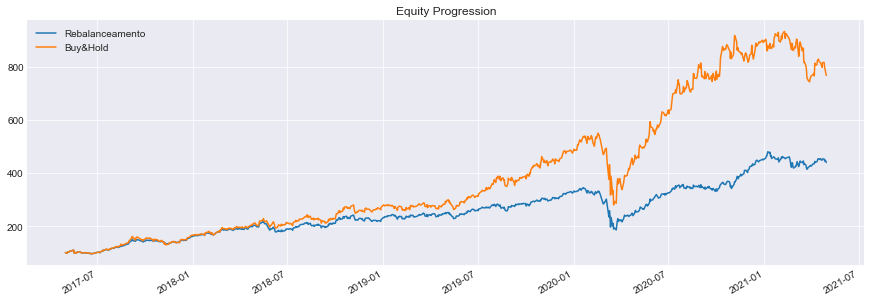

In [15]:
result.plot()

In [16]:
result.get_transactions()

price  quantity
Date       Security                 
2017-05-02 ABEV3.SA  16.59   15069.0
           MGLU3.SA   0.86  290697.0
           PETR4.SA  12.56   19904.0
           VALE3.SA  23.88   10469.0
2017-05-31 ABEV3.SA  16.72    -136.0
...                    ...       ...
2021-02-26 VALE3.SA  90.45   -1543.0
2021-03-31 ABEV3.SA  15.29   -4582.0
           MGLU3.SA  20.24    9642.0
           PETR4.SA  23.32   -2693.0
           VALE3.SA  97.97    -636.0

[192 rows x 2 columns]

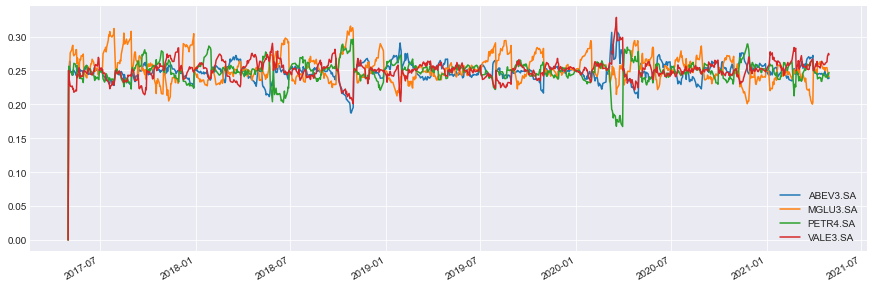

In [17]:
result.plot_security_weights()